In [1]:
import torch 
import torch.nn as nn 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
import torch.nn.functional as fun
from torch.autograd import Variable 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Hyper Parameters  
input_size = 784
num_classes = 10
hidden_size = 300  
num_epochs = 10
batch_size = 100
learning_rate = 0.2
# MNIST Dataset (Images and Labels) 
train_dataset = dsets.MNIST(root ='./data', 
							train = True, 
							transform = transforms.ToTensor(), 
							download = True) 

test_dataset = dsets.MNIST(root ='./data', 
						train = False, 
						transform = transforms.ToTensor()) 

# Dataset Loader (Input Pipline) 
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
										batch_size = batch_size, 
										shuffle = True) 

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
										batch_size = batch_size, 
										shuffle = False) 

# Model
class LeNET(nn.Module):
    def __init__(self):
        super(LeNET, self).__init__() 
        self.conv1 = nn.Conv2d(1, 6, 7, 1, 0)# 1 канал(черно-белый),если картинка цветная то 3 - так как RGB; 6 - выходов или подслоев,
        #каждый подслой имеет свои веса ;#input,output,kernel,stride,padding; выход тензоры 22x22 (28-kernel+1)
        self.maxpool1 = nn.MaxPool2d(2) #выход тензоры 11x11 по 6 каналам
        self.conv2 = nn.Conv2d(6, 16, 2, 1, 1)#padding=1 =>13x13    (13-2+1)=> выход 12x12 по 16 каналам
        self.maxpool2 = nn.MaxPool2d(2)#выход 6x6 по 16 каналам => 6x6x16=576
        self.relu = nn.ReLU() 
        self.dropout2d = nn.Dropout2d()
        self.fc1 = nn.Linear(576, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x): 
        out = self.relu(self.maxpool1(self.conv1(x)))
        out = self.relu(self.maxpool2(self.dropout2d(self.conv2(out))))
        out = out.view(-1, 576)
        out = self.relu(self.fc1(out)) 
        out = self.fc2(out) 
        return out 

model = LeNET() 

  
# Loss and Optimizer 
# Softmax is internally computed.  
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 
  
# Training the Model

for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        # Forward + Backward + Optimize 
        optimizer.zero_grad() 
        outputs = model(images)
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        if (i + 1) % 100 == 0: 
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, 
                     len(train_dataset) // batch_size, loss.item())) 
  
#Test the Model 
correct = 0
total = 0
for images, labels in test_loader: 
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
  
print('Accuracy of the model on the 10000 test images: % d %%' % ( 
            100 * correct / total))     

Epoch: [ 1/ 10], Step: [ 100/ 600], Loss: 0.5772
Epoch: [ 1/ 10], Step: [ 200/ 600], Loss: 0.4076
Epoch: [ 1/ 10], Step: [ 300/ 600], Loss: 0.3594
Epoch: [ 1/ 10], Step: [ 400/ 600], Loss: 0.1759
Epoch: [ 1/ 10], Step: [ 500/ 600], Loss: 0.1427
Epoch: [ 1/ 10], Step: [ 600/ 600], Loss: 0.1284
Epoch: [ 2/ 10], Step: [ 100/ 600], Loss: 0.1451
Epoch: [ 2/ 10], Step: [ 200/ 600], Loss: 0.1821
Epoch: [ 2/ 10], Step: [ 300/ 600], Loss: 0.0783
Epoch: [ 2/ 10], Step: [ 400/ 600], Loss: 0.0624
Epoch: [ 2/ 10], Step: [ 500/ 600], Loss: 0.1389
Epoch: [ 2/ 10], Step: [ 600/ 600], Loss: 0.0959
Epoch: [ 3/ 10], Step: [ 100/ 600], Loss: 0.1629
Epoch: [ 3/ 10], Step: [ 200/ 600], Loss: 0.1715
Epoch: [ 3/ 10], Step: [ 300/ 600], Loss: 0.0318
Epoch: [ 3/ 10], Step: [ 400/ 600], Loss: 0.0315
Epoch: [ 3/ 10], Step: [ 500/ 600], Loss: 0.0816
Epoch: [ 3/ 10], Step: [ 600/ 600], Loss: 0.0750
Epoch: [ 4/ 10], Step: [ 100/ 600], Loss: 0.0932
Epoch: [ 4/ 10], Step: [ 200/ 600], Loss: 0.0516
Epoch: [ 4/ 10], Ste

Предсказание: tensor(8)
Действительно: tensor(8)


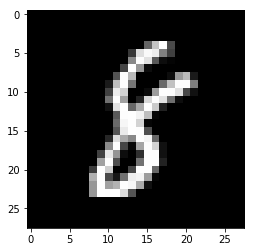

Предсказание: tensor(9)
Действительно: tensor(9)


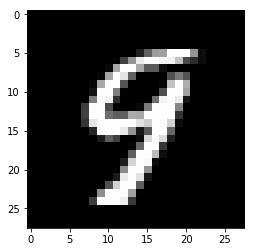

Предсказание: tensor(0)
Действительно: tensor(0)


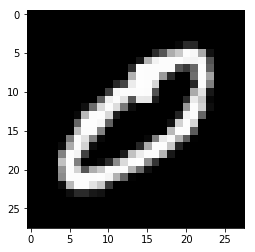

Предсказание: tensor(1)
Действительно: tensor(1)


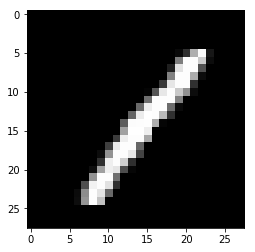

Предсказание: tensor(2)
Действительно: tensor(2)


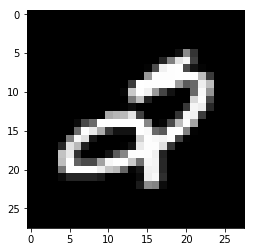

Предсказание: tensor(3)
Действительно: tensor(3)


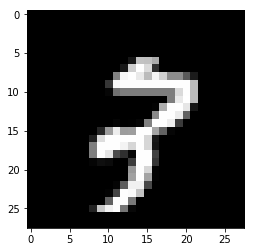

Предсказание: tensor(4)
Действительно: tensor(4)


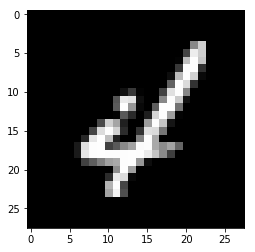

Предсказание: tensor(5)
Действительно: tensor(5)


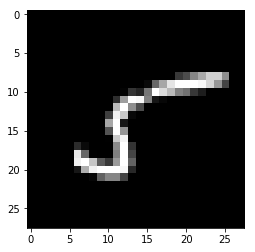

Предсказание: tensor(6)
Действительно: tensor(6)


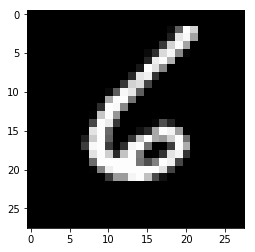

Предсказание: tensor(7)
Действительно: tensor(7)


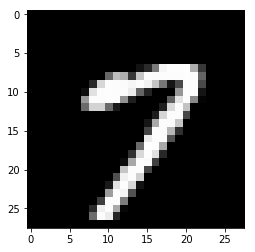

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 
for k in range(0,10):
    first_image = images[k] 
    first_image = np.array(first_image, dtype='float') 
    pixels = first_image.reshape((28, 28)) 
    plt.imshow(pixels, cmap='gray') 
    print("Предсказание:",predicted[k])
    print("Действительно:",labels[k])
    plt.show() 